# **Exploring Data Segmentation and Giving Behaviors**

Steps to be followed for the analysis:

* Data Collection: Understand the given dataset and identify essential features.
* Exploratory Data Analysis
* Data Cleaning and Handling Missing Data
* Feature Engineering: Trying to create new features by finding relation between existing features
* Algorithm Selection for Binary Classification Problem
* Identify the Accuracy Metric that would be best for the current scenario
* Model Training and Tuning
* Generate Insights from the Results

## Step1. Data Collection

I was given two different data files: **"Bio_Base_Data" and  "Gift_total_by_CSU_Since_FY2015"** . The first file had all the demographic details of the donors and the second file has the donation giving behaviour like the year of donation, CSU code where the amnt was donated and the total amount of donation

Suggested STEPS to take:

1. Check for meaning of the fields
2. Check for the data structure
3. Check for duplicates
4. Check for missing values
5. Check for field formats
6. Check for zero values that shouldn't be there
e.g. age, text, year
7. Decide which fields are nominal (categorical), ordinal, dummy, interval or ratio
8. Check for levels of categorical variables
9. Check for outliers
10. Check for inconsistencies
11. Check for hypen, commas, or period in the wrong places




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Analyzing the demographics data
# Making a list of missing value types

missing_values = ["-"]
df_bio = pd.read_csv("Bio_Base_Data.csv", na_values = missing_values)

In [7]:
df_bio.head()

,RANDOM_ID,AGE,PROFESSIONAL_SUFFIX,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGREE,FIRST_DEGYR,SECOND_DEGREE,SECOND_DEGYR,FINAL_DEGREE,FINAL_DEGYR,NUM_DEGREES,MULTI_DEGREE_CSUS_IND,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,0YDDHEX2,NaN,NaN,0,F,NaN,10000.0,K - $10K-$24.9K,Friend,Not a Member,NaN,Married,Midwest States,MI,48640-7230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,12-Apr-17,12-Apr-90,17,25,0,0,0,0,0,0,1,0,0,0,2,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HCMY2X37,41.0,NaN,0,F,Gen X,10000.0,K - $10K-$24.9K,Parent,Short-term Member,NaN,Married,Texas MidRange Towns,TX,78404-1734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,13-Jul-18,23-Feb-77,25,46,0,0,9,0,0,0,1,0,0,0,6,0,0,0,0,0,0,19,0,6,0,0,0,4,0,0,0,0,0,0,0
2,S49J7SLC,77.0,NaN,0,F,Boomer,NaN,z - Unknown,Friend,Not a Member,NaN,Married,Texas Small Towns,TX,75757-9374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,13-Feb-17,1-Aug-86,4,4,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,KKXN2R59,82.0,NaN,0,M,Silent,50000.0,H - $50K-$99.9K,Alumni,Life Member,NaN,Married,Austin Tx,TX,78737-8535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,BS,1962,NaN,0,NaN,0,1,0,...,0.0,0.0,0.0,0.0,0.0,22-Oct-19,5-Mar-80,30,33,0,0,0,3,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3S9EALE1,85.0,NaN,0,M,Silent,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,Texas Small Towns,TX,77465-9209,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,BS,1958,NaN,0,NaN,0,1,0,...,0.0,0.0,0.0,0.0,0.0,20-Oct-19,16-Aug-12,6,9,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91631 entries, 0 to 91630
Columns: 120 entries, RANDOM_ID to GRP_PG_CNT
dtypes: float64(34), int64(68), object(18)
memory usage: 83.9+ MB


In [9]:
# Check the total number of observations in the dataset
print('Total number of observations in the dataset are:',df_bio.shape[0])

Total number of observations in the dataset are: 91631


In [10]:
# Check for data structure
count_obj=0
count_int=0
count_float=0
for name,dtypes in df_bio.dtypes.iteritems():
  if(dtypes=='object'):
    count_obj+=1
  if(dtypes=='int64'):
    count_int+=1
  if(dtypes=='float64'):
    count_float+=1
    

print('\nThere are total',count_obj,'columns with object datatype.')
print('\nThere are total',count_int,'columns with int64 datatype.')
print('\nThere are total',count_float,'columns with float64 datatype.')


There are total 18 columns with object datatype.

There are total 68 columns with int64 datatype.

There are total 34 columns with float64 datatype.


In [12]:
# Check if data has duplicate entries

print(df.shape)
df_bio = df_bio.drop_duplicates(keep='first')
print('Shape after dropping the values: ',df.shape)

(91631, 120)
Shape after dropping the values:  (91631, 120)


In [13]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    nullcount = df[col].isnull().sum()
    pct_missing = np.mean(df[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))
   

AGE 20495 - 22%
PROFESSIONAL_SUFFIX 83865 - 92%
GENDER 473 - 1%
GENERATION 20495 - 22%
HH_CAPACITY_RANGE 46782 - 51%
EX_MEMBER 319 - 0%
ETHNICITY 41541 - 45%
MARITAL_STATUS 2305 - 3%
PREF_STATE 1434 - 2%
PREF_ZIPCODE 507 - 1%
FIRST_DEGREE 33309 - 36%
SECOND_DEGREE 80592 - 88%
FINAL_DEGREE 90551 - 99%


In [15]:
count_age_zero=0
for i in df_bio.AGE:
  if(i==0):
    count_age_zero+=1
print('Age 0 count is: ',count_age_zero)


Age 0 count is:  9


In [16]:
check_col = ['FIRST_DEGYR','SECOND_DEGYR','FINAL_DEGYR']
#-Check for zero values that shouldn't be there e.g. age, text, year

check_col = ['AGE','FIRST_DEGYR','SECOND_DEGYR','FINAL_DEGYR']

for col in check_col:
  count = 0
  for i in df_bio[col]:
    if(i==0):
      count+=1
  print('Number of zeroes in ',col,'is -',count)

Number of zeroes in  AGE is - 9
Number of zeroes in  FIRST_DEGYR is - 33309
Number of zeroes in  SECOND_DEGYR is - 80592
Number of zeroes in  FINAL_DEGYR is - 90551


Nominal Scale, also called the categorical variable scale, is defined as a scale used for labeling variables into distinct classifications and doesn’t involve a quantitative value or order.

In [17]:
#Check for levels of categorical variables

nominal_columns = ['GENDER','GENERATION','LINK_TO_UT','EX_MEMBER','ETHNICITY','MARITAL_STATUS'] 

for nm_col in nominal_columns:
  print(df_bio[nm_col].value_counts(),'\n')


M    46373
F    44065
U      720
Name: GENDER, dtype: int64 

Boomer    26418
Gen X     20573
Gen Y     19182
Silent     4778
G.I.        172
2020          9
2002          3
2007          1
Name: GENERATION, dtype: int64 

Alumni                 58322
Friend                 23516
Parent                  7203
Student                 1257
No Degree, Attended     1251
Other                     82
Name: LINK_TO_UT, dtype: int64 

Not a Member         59451
Life Member          16291
Lapsed Member        10844
Short-term Member     4371
Assoc. Life            355
Name: EX_MEMBER, dtype: int64 

White         38645
Asian Am       4768
Hisp Am        4764
African Am     1794
Am Indian       119
Name: ETHNICITY, dtype: int64 

Unknown      45653
Married      39400
Single        1491
Widowed       1399
Divorced      1366
Separated       17
Name: MARITAL_STATUS, dtype: int64 



Ordinal Scale is defined as a variable measurement scale used to simply depict the order of variables and not the difference between each of the variables.

In [19]:
df_bio['HH_CAPACITY_RANGE'].value_counts()

10000.0        16578
25000.0        15323
50000.0         6705
100000.0        4331
250000.0        1300
500000.0         427
1000000.0        147
5000000.0         33
25000000.0         3
100000000.0        2
Name: HH_CAPACITY_RANGE, dtype: int64

Interval Scale is defined as a numerical scale where the order of the variables is known as well as the difference between these variables.

In [20]:
df_bio['CAMPAIGN_ROLLUP_CAPACITY'].value_counts()

z - Unknown          39788
K - $10K-$24.9K      16579
J - $25K-$49.9K      13570
H - $50K-$99.9K       6714
S - $0                6395
G - $100K-$999.9K     6151
I - $25K-$99.9K       1775
N - $2.5K-$9.9K        247
F - $1M-$4.9M          187
L - < $10K             133
P - < $2.5k             36
E - $5M-$9.9M           25
D - $10M-$24.9M         18
C - $25M-$49.9M          7
A - >$100M+              3
B - > $50M+              3
Name: CAMPAIGN_ROLLUP_CAPACITY, dtype: int64

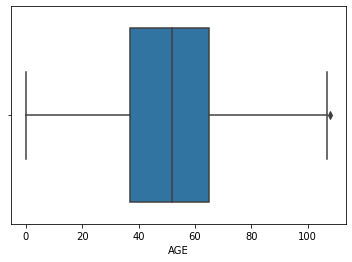

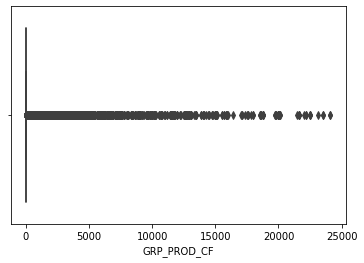

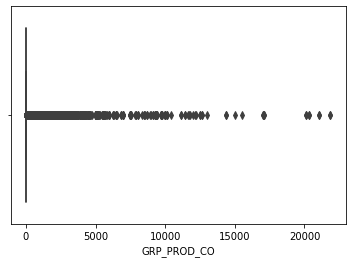

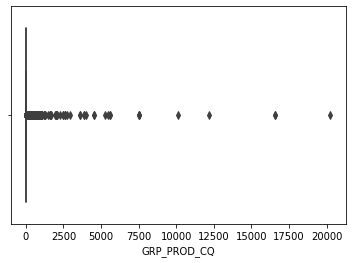

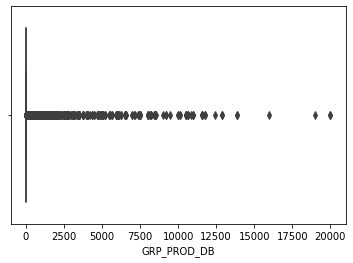

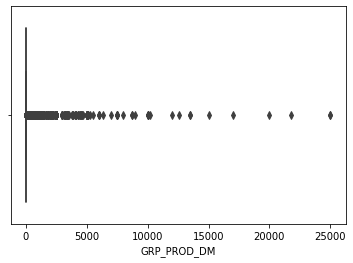

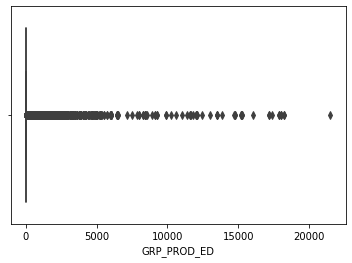

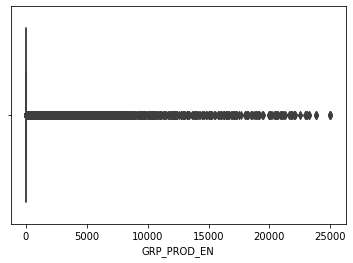

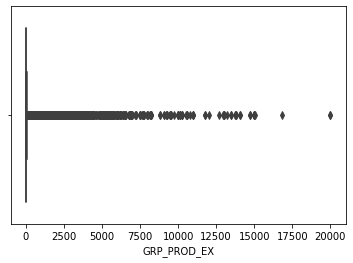

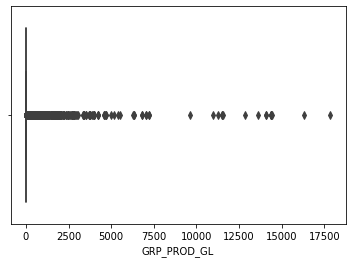

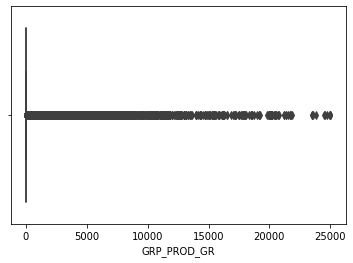

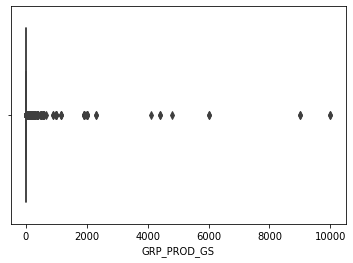

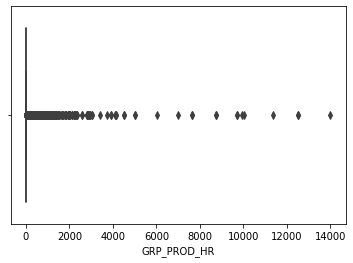

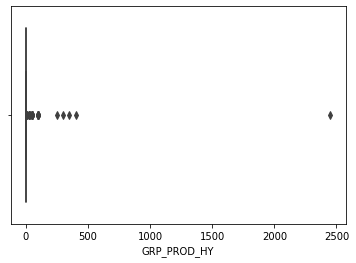

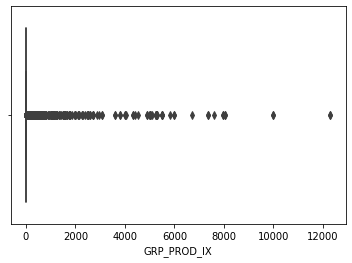

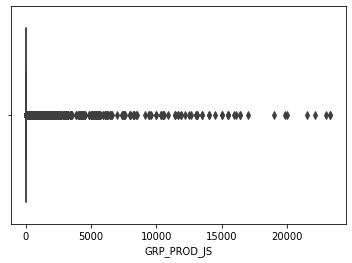

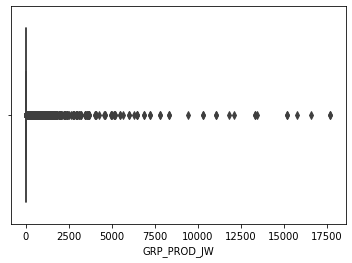

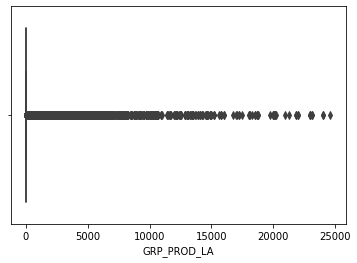

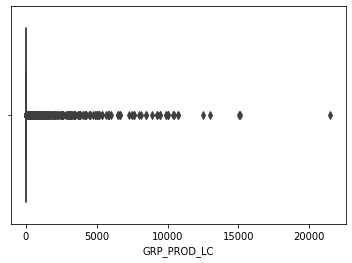

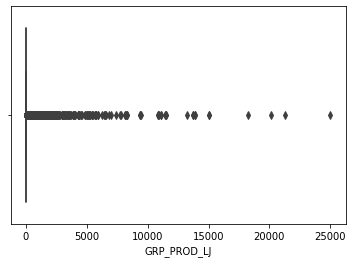

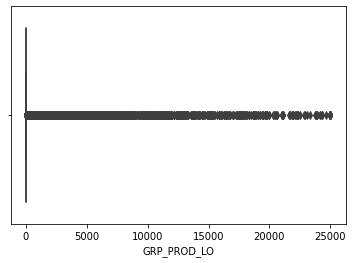

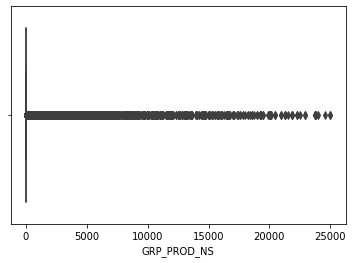

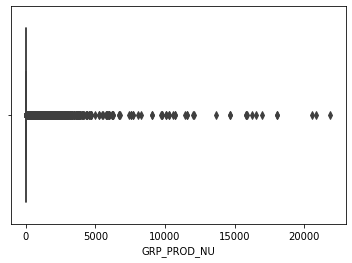

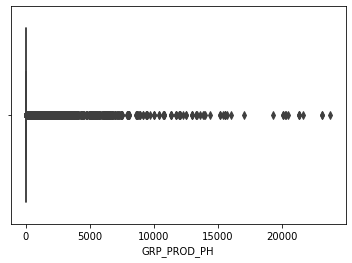

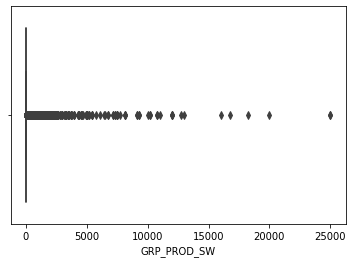

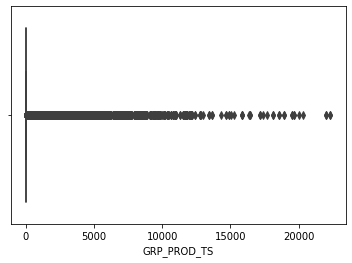

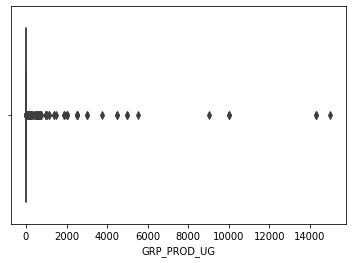

In [21]:
# Check for outliers
# feature_names -- names of columns that might have outlier in the data

feature_names = ['AGE','GRP_PROD_CF','GRP_PROD_CO','GRP_PROD_CQ','GRP_PROD_DB','GRP_PROD_DM','GRP_PROD_ED','GRP_PROD_EN','GRP_PROD_EX','GRP_PROD_GL','GRP_PROD_GR',
                 'GRP_PROD_GS','GRP_PROD_HR','GRP_PROD_HY','GRP_PROD_IX','GRP_PROD_JS','GRP_PROD_JW','GRP_PROD_LA','GRP_PROD_LC','GRP_PROD_LJ','GRP_PROD_LO','GRP_PROD_NS',
                 'GRP_PROD_NU','GRP_PROD_PH','GRP_PROD_SW','GRP_PROD_TS','GRP_PROD_UG','GRP_PROD_VS']

for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x=feature_names[i], data=df_bio)


Data Analysis for Donation Amount data

In [22]:
df_amnt = pd.read_csv("Gift_total_by_CSU_Since_FY2015.csv")

In [23]:
df_amnt.head()

,RANDOM_ID,CSU_CODE,FISCAL_YEAR_ENDING,DONOR_INTENT_ID,TOTAL_AMT_2015_2020
0,THTKM076,CF,2020,5294631,50.0
1,THTKM076,DM,2016,205965,25.0
2,THTKM076,NS,2019,4808641,25.0
3,THTKM076,NS,2018,4447701,50.0
4,THTKM076,NS,2017,264264,25.0


In [24]:
df_amnt.describe()

,FISCAL_YEAR_ENDING,DONOR_INTENT_ID,TOTAL_AMT_2015_2020
count,258148.000000,2.581480e+05,258148.000000
mean,2017.348037,1.447095e+07,691.895821
std,1.669702,3.373806e+08,3640.849934
min,2015.000000,1.917000e+04,0.010000
25%,2016.000000,2.939698e+05,50.000000
50%,2017.000000,3.789638e+06,100.000000
75%,2019.000000,4.816206e+06,250.000000
max,2020.000000,1.001483e+10,99999.240000


In [25]:
df_amnt.isnull().sum()

RANDOM_ID              0
CSU_CODE               0
FISCAL_YEAR_ENDING     0
DONOR_INTENT_ID        0
TOTAL_AMT_2015_2020    0
dtype: int64

We can observe that there are no missing values for this dataset.

## Step 2: Exploratory Data Analysis

In [26]:
df = df_amnt

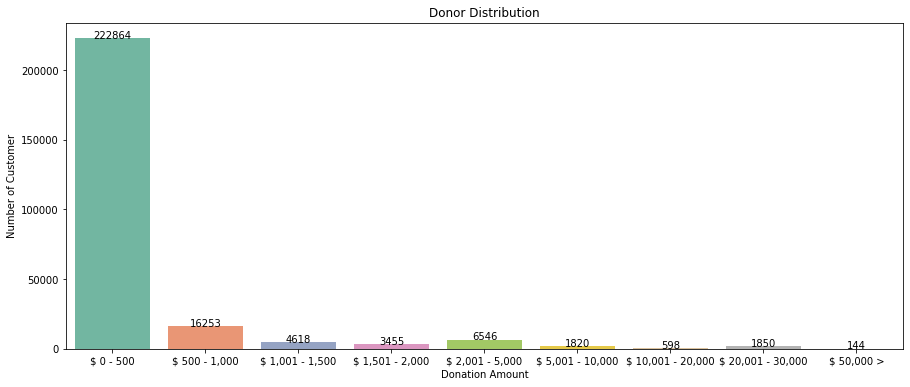

In [27]:
ta0_500 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] >= 0) & (df["TOTAL_AMT_2015_2020"] <= 500)]
ta500_1000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 500) & (df["TOTAL_AMT_2015_2020"] <= 1000)]
ta1000_1500 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 1000) & (df["TOTAL_AMT_2015_2020"] <= 1500)]
ta1500_2000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 1500) & (df["TOTAL_AMT_2015_2020"] <= 2000)]
ta2000_5000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 2000) & (df["TOTAL_AMT_2015_2020"] <= 5000)]
ta5000_10000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 5000) & (df["TOTAL_AMT_2015_2020"] <= 10000)]
ta1000_20000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 10000) & (df["TOTAL_AMT_2015_2020"] <= 20000)]
ta2000_30000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 20000) & (df["TOTAL_AMT_2015_2020"] <= 50000)]
ta50000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 50000)]

aix = ["$ 0 - 500", "$ 500 - 1,000", "$ 1,001 - 1,500", "$ 1,501 - 2,000", "$ 2,001 - 5,000","$ 5,001 - 10,000","$ 10,001 - 20,000","$ 20,001 - 30,000","$ 50,000 >"]
aiy = [len(ta0_500.values), len(ta500_1000.values), len(ta1000_1500.values), len(ta1500_2000.values), len(ta2000_5000.values),len(ta5000_10000),len(ta1000_20000),len(ta2000_30000),len(ta50000)]

plt.figure(figsize=(15,6))
ax = sns.barplot(x=aix, y=aiy, palette="Set2")


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, aiy[i],ha="center")

plt.title("Donor Distribution")
plt.xlabel("Donation Amount")
plt.ylabel("Number of Customer")
plt.show()

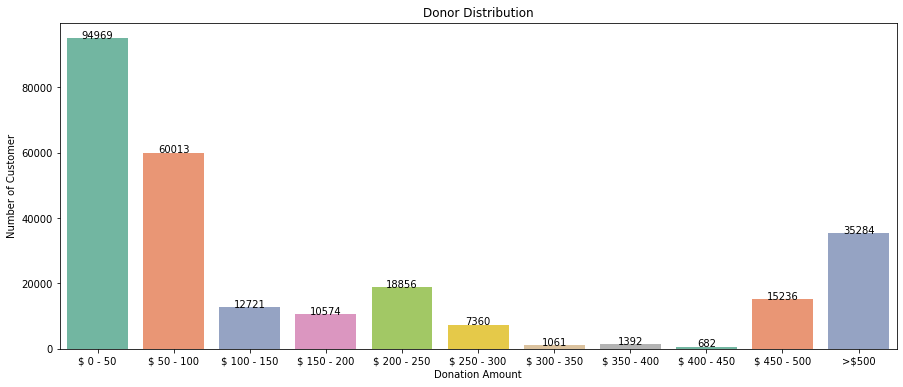

In [28]:
ta0_50 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] >= 0) & (df["TOTAL_AMT_2015_2020"] <= 50)]
ta50_100 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 50) & (df["TOTAL_AMT_2015_2020"] <= 100)]
ta100_150 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 100) & (df["TOTAL_AMT_2015_2020"] <= 150)]
ta150_200 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 150) & (df["TOTAL_AMT_2015_2020"] <= 200)]
ta200_250 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 200) & (df["TOTAL_AMT_2015_2020"] <= 250)]
ta250_300 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 250) & (df["TOTAL_AMT_2015_2020"] <= 300)]
ta300_350 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 300) & (df["TOTAL_AMT_2015_2020"] <= 350)]
ta350_400 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 350) & (df["TOTAL_AMT_2015_2020"] <= 400)]
ta400_450 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 400) & (df["TOTAL_AMT_2015_2020"] <= 450)]
ta450_500 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 450) & (df["TOTAL_AMT_2015_2020"] <= 500)]
ta500 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 500)]

aix1 = ["$ 0 - 50", "$ 50 - 100", "$ 100 - 150", "$ 150 - 200", "$ 200 - 250","$ 250 - 300","$ 300 - 350","$ 350 - 400","$ 400 - 450","$ 450 - 500",">$500"]
aiy1 = [len(ta0_50.values), len(ta50_100.values), len(ta100_150.values), len(ta150_200.values), len(ta200_250.values),len(ta250_300),len(ta300_350),len(ta350_400),len(ta400_450),len(ta450_500),len(ta500)]

plt.figure(figsize=(15,6))
ax1 = sns.barplot(x=aix1, y=aiy1, palette="Set2")


for i, p in enumerate(ax1.patches):
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1, aiy1[i],ha="center")

plt.title("Donor Distribution")
plt.xlabel("Donation Amount")
plt.ylabel("Number of Customer")
plt.show()

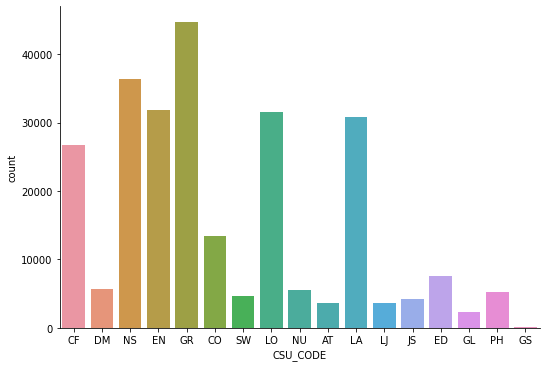

In [36]:
sns.catplot("CSU_CODE", data=df, aspect=1.5, kind="count")

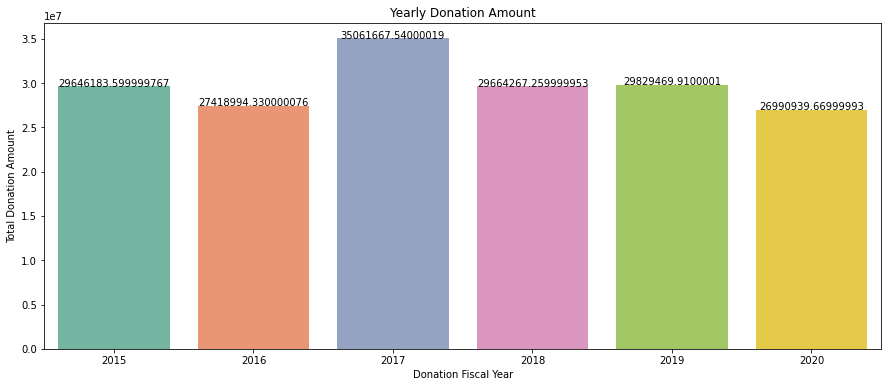

In [37]:
amnt_per_year = df.groupby('FISCAL_YEAR_ENDING')['TOTAL_AMT_2015_2020'].sum()
amnt_per_year_df=amnt_per_year.to_frame().reset_index()
amnt_per_year_df

ax = amnt_per_year_df['FISCAL_YEAR_ENDING']
ay = amnt_per_year_df['TOTAL_AMT_2015_2020']

plt.figure(figsize=(15,6))
ax = sns.barplot(x=ax, y=ay, palette="Set2")


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, ay[i],ha="center")

plt.title("Yearly Donation Amount")
plt.xlabel("Donation Fiscal Year")
plt.ylabel("Total Donation Amount")
plt.show()

# Donation amount in 2020 was 26 million approx

In [38]:
giving_year_count = df.groupby(['RANDOM_ID','FISCAL_YEAR_ENDING'])['TOTAL_AMT_2015_2020'].sum()

In [39]:
user_yearly_data =  giving_year_count.to_frame().reset_index()
print(user_yearly_data)

       RANDOM_ID  FISCAL_YEAR_ENDING  TOTAL_AMT_2015_2020
0       00017EH9                2015                15.00
1       000V0H91                2015               250.00
2       001J3BUD                2015               500.00
3       001J3BUD                2018                25.00
4       001J3BUD                2020               294.23
...          ...                 ...                  ...
204253  ZZZC54VI                2015              1499.94
204254  ZZZC54VI                2017              4999.80
204255  ZZZPEPYG                2018               100.00
204256  ZZZPEPYG                2019               100.00
204257  ZZZPEPYG                2020               250.00

[204258 rows x 3 columns]


In [40]:
user_yearly_data

,RANDOM_ID,FISCAL_YEAR_ENDING,TOTAL_AMT_2015_2020
0,00017EH9,2015,15.00
1,000V0H91,2015,250.00
2,001J3BUD,2015,500.00
3,001J3BUD,2018,25.00
4,001J3BUD,2020,294.23
...,...,...,...
204253,ZZZC54VI,2015,1499.94
204254,ZZZC54VI,2017,4999.80
204255,ZZZPEPYG,2018,100.00
204256,ZZZPEPYG,2019,100.00


In [41]:
user_yearly_data_df = user_yearly_data.groupby(['RANDOM_ID']).nunique()
user_yearly_data_df

,FISCAL_YEAR_ENDING,TOTAL_AMT_2015_2020
RANDOM_ID,,
00017EH9,1,1
000V0H91,1,1
001J3BUD,3,3
001RB8B4,1,1
001TY1IF,5,3
...,...,...
ZZYT6KZ6,3,1
ZZZ7S81M,1,1
ZZZBT9C0,1,1


In [42]:
user_yearly_data_df = user_yearly_data_df.drop(columns=['TOTAL_AMT_2015_2020'])
user_yearly_data_df = user_yearly_data_df.rename(columns={'index': 'RANDOM_ID','FISCAL_YEAR_ENDING':'Giving_Year_Count'}).reset_index()

In [43]:
test = user_yearly_data_df['Giving_Year_Count'].value_counts() 
test

1    54694
2    16259
3     9298
4     6840
5     5870
6     5407
Name: Giving_Year_Count, dtype: int64

{1: 54694, 2: 16259, 3: 9298, 4: 6840, 5: 5870, 6: 5407}
Total people who have donated:  98368


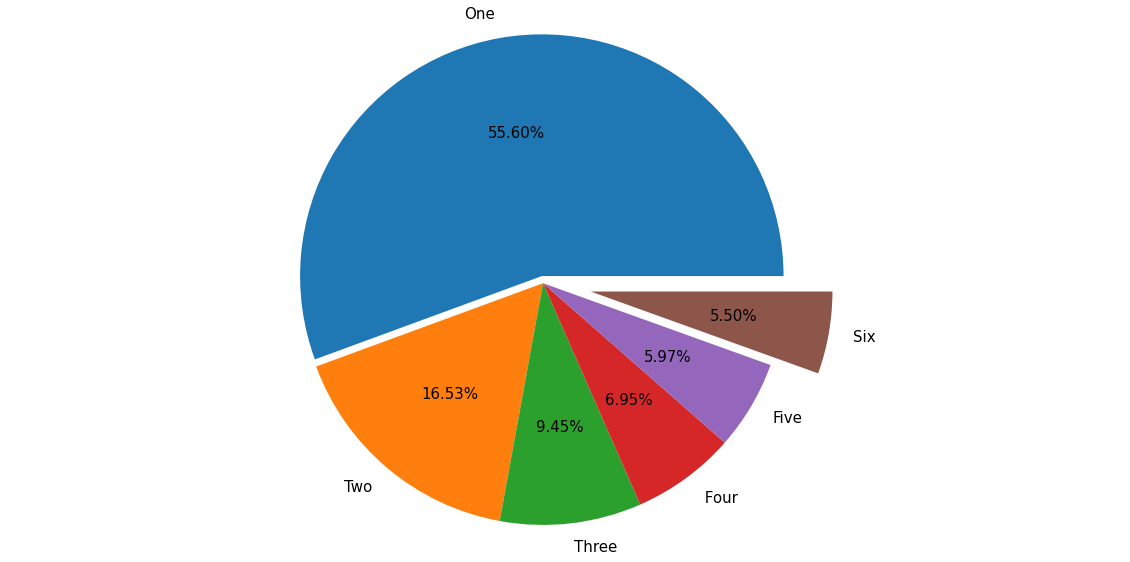

In [44]:
year_data = dict(test)
donor_count = sum(test)
year_list = list(year_data.values())
print(year_data)
print('Total people who have donated: ',donor_count)

#Pie Chart showing donor distribution
year_list

my_labels = 'One','Two','Three', ' Four','Five','Six'
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize=(20,10))
explode = [0.03,0,0,0,0,0.2] # To slice the perticuler section
plt.pie(year_list,labels=my_labels,autopct='%1.2f%%',explode=explode,textprops=textprops)
plt.axis('equal')
plt.show()

In [45]:
dum_df = pd.get_dummies(df, columns=["FISCAL_YEAR_ENDING"], prefix=["Donation_Year_"])
dum_df 

,RANDOM_ID,CSU_CODE,DONOR_INTENT_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020
0,THTKM076,CF,5294631,50.00,0,0,0,0,0,1
1,THTKM076,DM,205965,25.00,0,1,0,0,0,0
2,THTKM076,NS,4808641,25.00,0,0,0,0,1,0
3,THTKM076,NS,4447701,50.00,0,0,0,1,0,0
4,THTKM076,NS,264264,25.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
258143,PCX8A1SP,GR,3224609,100.00,1,0,0,0,0,0
258144,F3JAEMON,LA,3492004,40.00,1,0,0,0,0,0
258145,NQVCEOG8,NS,72452,100.00,1,0,0,0,0,0
258146,KL31U0S6,ED,83353,20.15,1,0,0,0,0,0


In [46]:
## data pre processing
## Drop CSU_CODE and DONOR_INTENT_ID
dum_df = dum_df .drop(columns=['CSU_CODE','DONOR_INTENT_ID'])
dum_df

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020
0,THTKM076,50.00,0,0,0,0,0,1
1,THTKM076,25.00,0,1,0,0,0,0
2,THTKM076,25.00,0,0,0,0,1,0
3,THTKM076,50.00,0,0,0,1,0,0
4,THTKM076,25.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
258143,PCX8A1SP,100.00,1,0,0,0,0,0
258144,F3JAEMON,40.00,1,0,0,0,0,0
258145,NQVCEOG8,100.00,1,0,0,0,0,0
258146,KL31U0S6,20.15,1,0,0,0,0,0


In [47]:
giving_pattern_df = dum_df.groupby(by='RANDOM_ID').agg({'TOTAL_AMT_2015_2020': 'sum',
                              'Donation_Year__2015': 'sum',
                              'Donation_Year__2016': 'sum',
                              'Donation_Year__2017': 'sum',
                              'Donation_Year__2018': 'sum',
                              'Donation_Year__2019':'sum',
                              'Donation_Year__2020':'sum'}).reset_index()

In [50]:
#user_yearly_data_df 
df_merge = pd.merge(left=giving_pattern_df, right=user_yearly_data_df, left_on='RANDOM_ID', right_on='RANDOM_ID',how='left')
df_merge

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count
0,00017EH9,15.00,1,0,0,0,0,0,1
1,000V0H91,250.00,1,0,0,0,0,0,1
2,001J3BUD,819.23,1,0,0,1,0,2,3
3,001RB8B4,485.14,0,0,0,0,2,0,1
4,001TY1IF,1050.00,1,1,1,1,0,3,5
...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,3
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,2


In [48]:
def number_of_years_skipped(Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020):

  if ((Donation_Year__2015>0 and Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2016>0 and Donation_Year__2018 >0 and Donation_Year__2020 >0)):
    return 0
  elif ((Donation_Year__2015>0 and Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  elif ((Donation_Year__2016>0 and Donation_Year__2018>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 1
  
  elif ((Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  elif ((Donation_Year__2018>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 1

  elif ((Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  
  ### skips two year

  elif ((Donation_Year__2015>0 and Donation_Year__2018>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 == 0 and Donation_Year__2020 ==0)):
    return 2

  elif ((Donation_Year__2016>0 and Donation_Year__2019>0) and (Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2015 == 0 and Donation_Year__2020 ==0)):
    return 2
  
  elif ((Donation_Year__2017>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 2

    ### skips three year

  elif ((Donation_Year__2015>0 and Donation_Year__2019>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 3

  elif ((Donation_Year__2016>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2019 ==0)):
    return 3

    ### skips four year

  elif ((Donation_Year__2015>0 and Donation_Year__2020>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2019 ==0)):
    return 4

  else:
    return 5



In [67]:
df_merge['Skip_Years'] = df_merge.apply(lambda x: number_of_years_skipped(x['Donation_Year__2015'],x['Donation_Year__2016'],x['Donation_Year__2017'],x['Donation_Year__2018'],
                           x['Donation_Year__2019'],x['Donation_Year__2020']),axis=1)

In [68]:
skip_list = df_merge['Skip_Years'].value_counts()
skip_data = dict(skip_list)
skip_yr_list = list(skip_data.values())
print(skip_data)
skip_yr_list


{5: 88147, 0: 5407, 1: 2006, 2: 1436, 3: 1020, 4: 352}


[88147, 5407, 2006, 1436, 1020, 352]

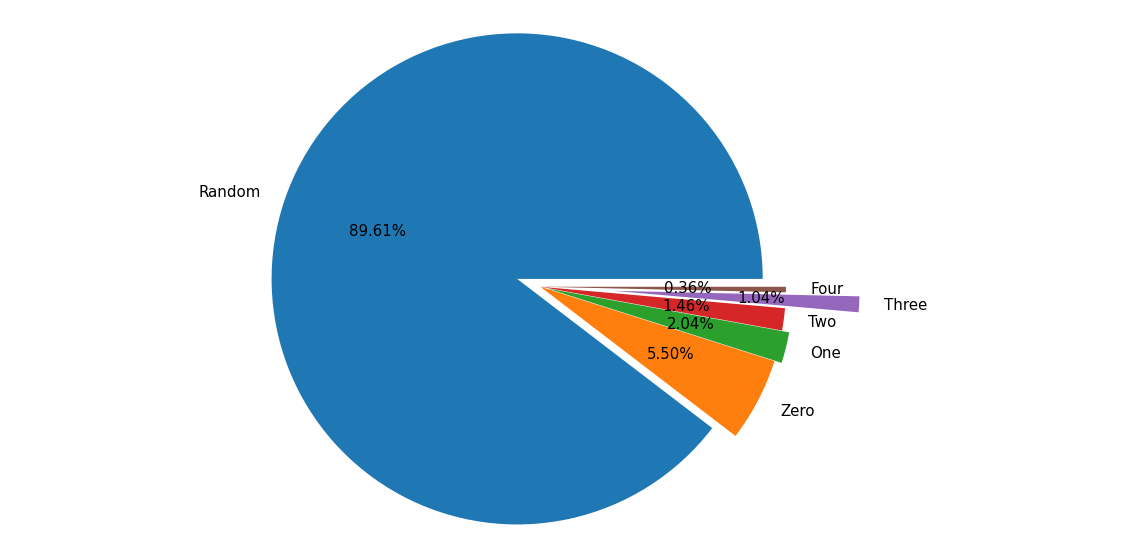

In [69]:
### plotting the skipping pattern
#Pie Chart showing donor distribution
skip_yr_list

skip_labels = 'Random','Zero','One', 'Two','Three','Four'
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize=(20,10))
explode = [0.1,0.0,0.03,0.,0.3,0.0] # To slice the perticuler section
plt.pie(skip_yr_list,labels=skip_labels,explode=explode, autopct='%1.2f%%',textprops=textprops)
plt.axis('equal')
plt.show()

In [70]:
df_data = pd.merge(left = df_merge, right = df_bio, left_on = "RANDOM_ID", right_on = "RANDOM_ID", how ='left')

In [71]:
df_data

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count,Skip_Years,AGE,PROFESSIONAL_SUFFIX,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,00017EH9,15.00,1,0,0,0,0,0,1,5,33.0,Ph.D.,1.0,M,Gen Y,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,West Coast States,CA,94070-4866,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23-Oct-14,23-Oct-14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000V0H91,250.00,1,0,0,0,0,0,1,5,NaN,NaN,0.0,M,NaN,25000.0,I - $25K-$99.9K,Parent,Not a Member,NaN,NaN,Texas Metropolitan,TX,75093-3458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20-May-15,20-May-15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001J3BUD,819.23,1,0,0,1,0,2,3,5,35.0,NaN,0.0,F,Gen Y,25000.0,J - $25K-$49.9K,Alumni,Not a Member,Asian Am,Unknown,Tri-States,PA,19123-2242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29-Jan-20,21-Apr-14,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001RB8B4,485.14,0,0,0,0,2,0,1,5,NaN,NaN,0.0,M,NaN,NaN,z - Unknown,Friend,Not a Member,NaN,Single,Other,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15-Mar-19,15-Mar-19,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001TY1IF,1050.00,1,1,1,1,0,3,5,5,69.0,NaN,0.0,F,Boomer,100000.0,G - $100K-$999.9K,Friend,Life Member,NaN,Married,Texas Metropolitan,TX,77056-2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18-Dec-19,28-Jun-00,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,3,5,96.0,NaN,0.0,F,G.I.,NaN,z - Unknown,Alumni,Short-term Member,NaN,Widowed,Texas Small Towns,TX,75757-9317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,12-Jun-20,30-Dec-75,22.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1,5,48.0,NaN,0.0,F,Gen X,NaN,z - Unknown,Friend,Not a Member,NaN,Unknown,Austin Tx,TX,78664-6141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1-May-16,20-Aug-14,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1,5,76.0,NaN,

In [72]:

#To select rows whose column value equals a scalar, some_value, use ==:
df_skip_0 = df_data.loc[df_data['Skip_Years'] == 0]

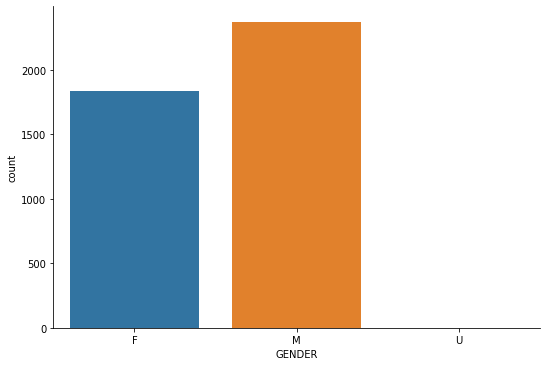

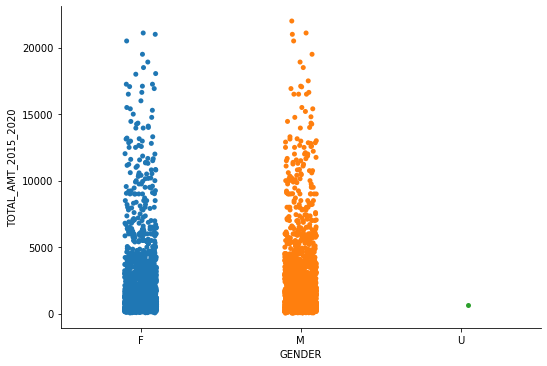

In [73]:
sns.catplot("GENDER", data=df_skip_0, aspect=1.5, kind="count")
sns.catplot(x="GENDER", y="TOTAL_AMT_2015_2020",aspect=1.5, data=df_skip_0)


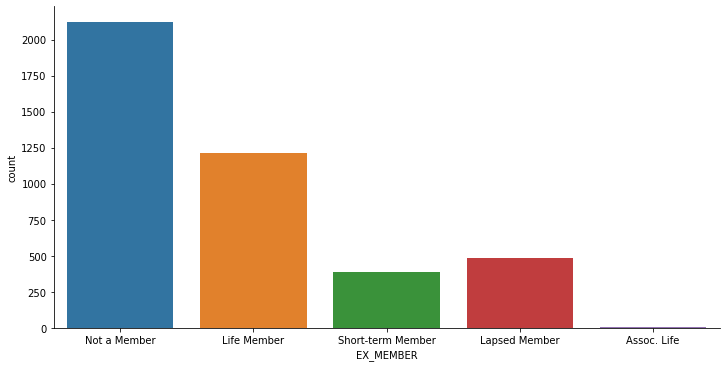

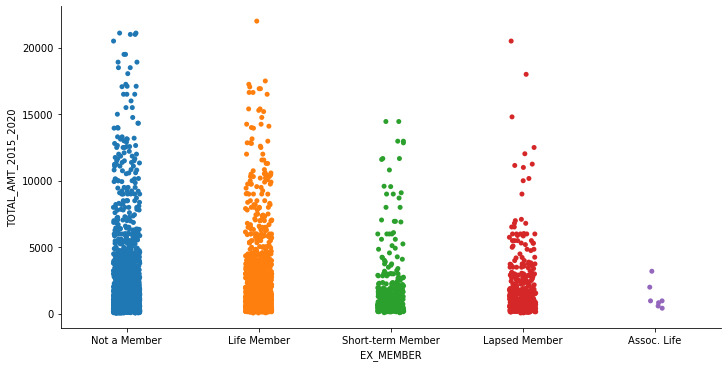

In [74]:
sns.catplot("EX_MEMBER", data=df_skip_0, aspect=2, kind="count")
sns.catplot(x="EX_MEMBER", y="TOTAL_AMT_2015_2020",aspect=2, data=df_skip_0)


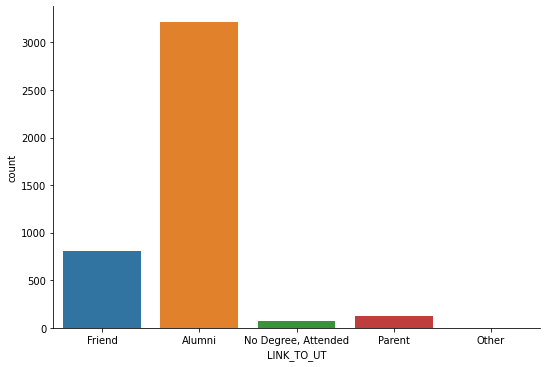

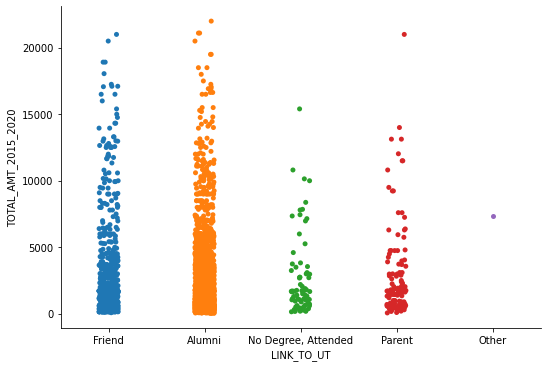

In [77]:
sns.catplot("LINK_TO_UT", data=df_skip_0, aspect=1.5, kind="count")

sns.catplot(x="LINK_TO_UT", y="TOTAL_AMT_2015_2020",aspect=1.5, data=df_skip_0)


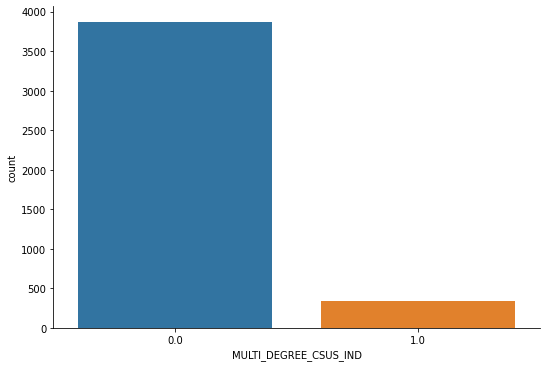

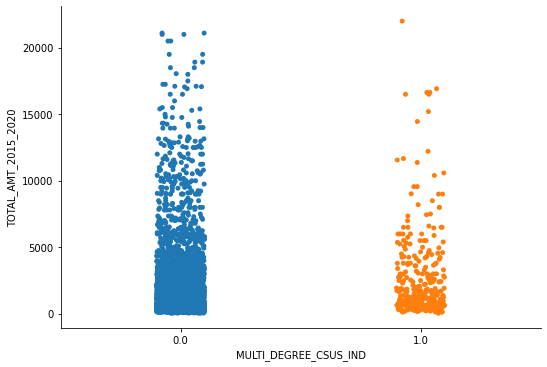

In [78]:

sns.catplot(x="MULTI_DEGREE_CSUS_IND", data=df_skip_0, aspect=1.5, kind="count")

sns.catplot(x="MULTI_DEGREE_CSUS_IND", y="TOTAL_AMT_2015_2020",aspect=1.5, data=df_skip_0)



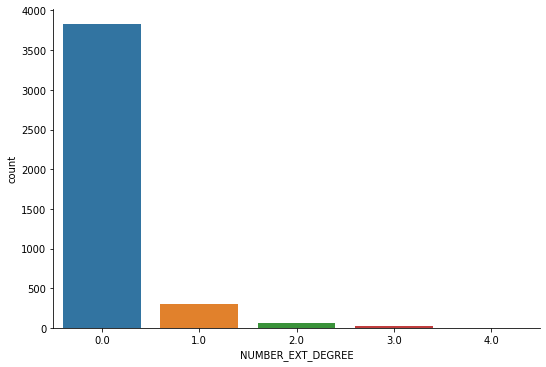

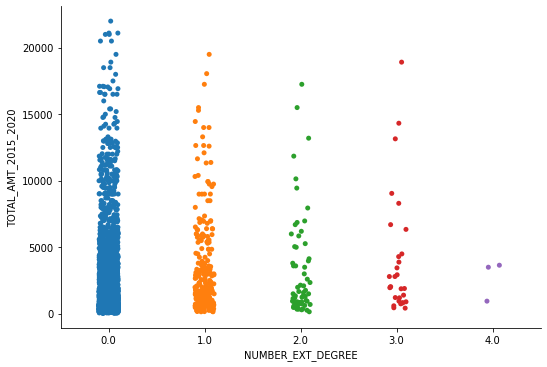

In [79]:

sns.catplot(x="NUMBER_EXT_DEGREE", data=df_skip_0, aspect=1.5, kind="count")

sns.catplot(x="NUMBER_EXT_DEGREE", y="TOTAL_AMT_2015_2020",aspect=1.5, data=df_skip_0)



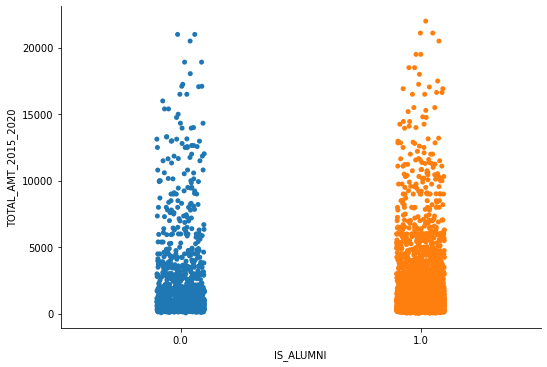

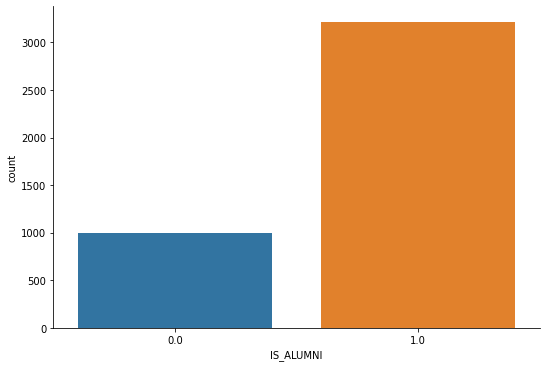

In [81]:
sns.catplot(x="IS_ALUMNI", y="TOTAL_AMT_2015_2020",aspect=1.5,data=df_skip_0)
sns.catplot(x="IS_ALUMNI", data=df_skip_0, aspect=1.5, kind="count")


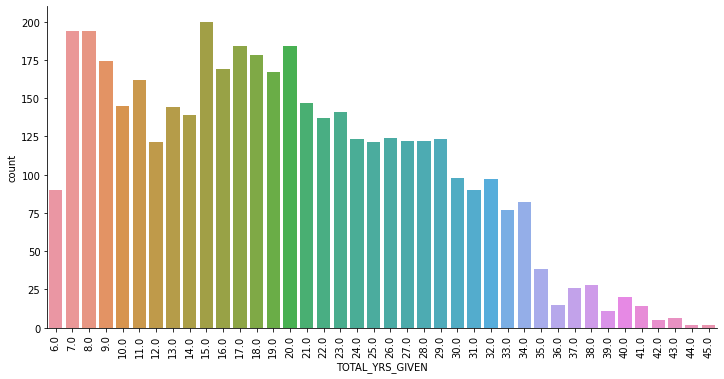

In [83]:
#TOTAL_YRS_GIVEN
plt_yrs = sns.catplot(x="TOTAL_YRS_GIVEN", data=df_skip_0, aspect=2, kind="count")
plt_yrs.set_xticklabels(rotation=90)

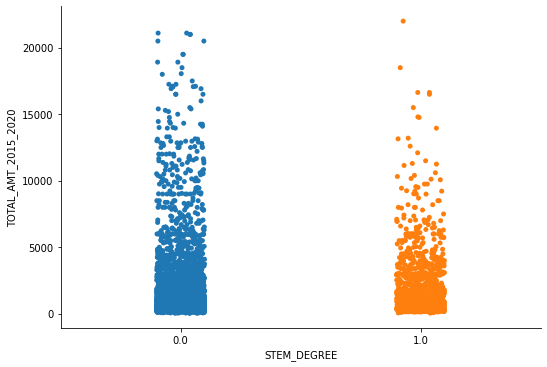

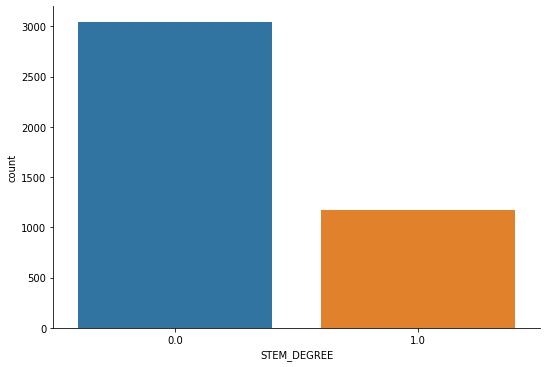

In [85]:
sns.catplot(x="STEM_DEGREE", y="TOTAL_AMT_2015_2020",aspect=1.5,data=df_skip_0)
sns.catplot(x="STEM_DEGREE", data=df_skip_0, aspect=1.5, kind="count")


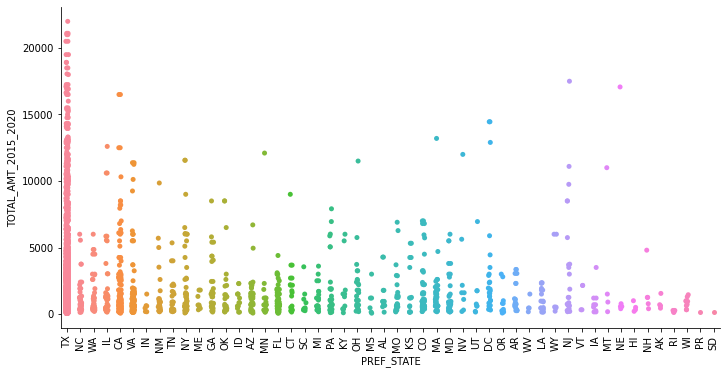

In [86]:
plt_state = sns.catplot(x="PREF_STATE", y="TOTAL_AMT_2015_2020",aspect=2, data=df_skip_0)
plt_state.set_xticklabels(rotation=90)

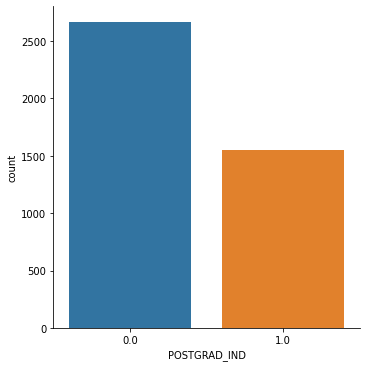

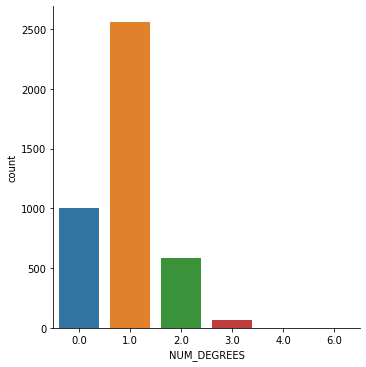

In [88]:
sns.catplot(x="POSTGRAD_IND",kind="count",aspect=1, data=df_skip_0)
# POSTGRAD_IND
# UNDERGRAD_IND
sns.catplot(x="NUM_DEGREES",kind="count",aspect=1, data=df_skip_0)

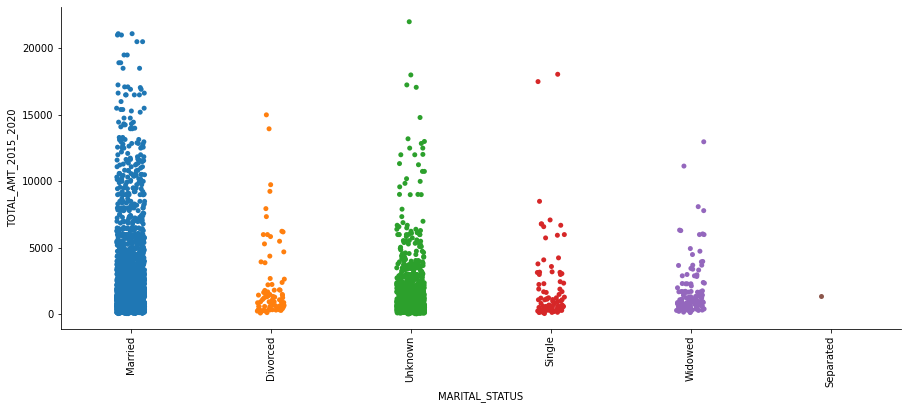

In [89]:
 plt_m = sns.catplot(x="MARITAL_STATUS", y="TOTAL_AMT_2015_2020", data=df_skip_0,  aspect=25/10)
 plt_m.set_xticklabels(rotation=90)

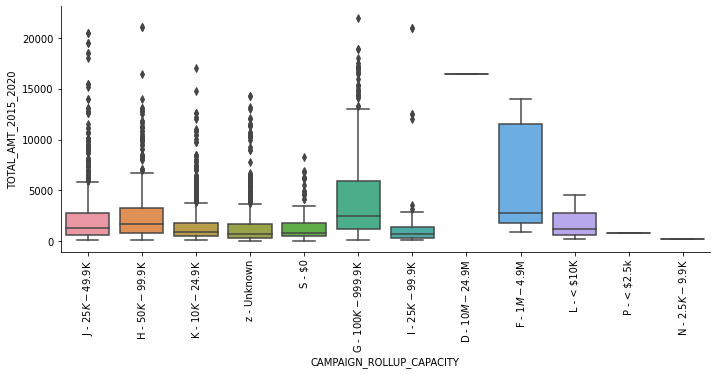

In [91]:

g = sns.catplot(x='CAMPAIGN_ROLLUP_CAPACITY', y='TOTAL_AMT_2015_2020', data = df_skip_0,height=4,
             aspect=25/10 ,kind='box')
g.set_xticklabels(rotation=90)

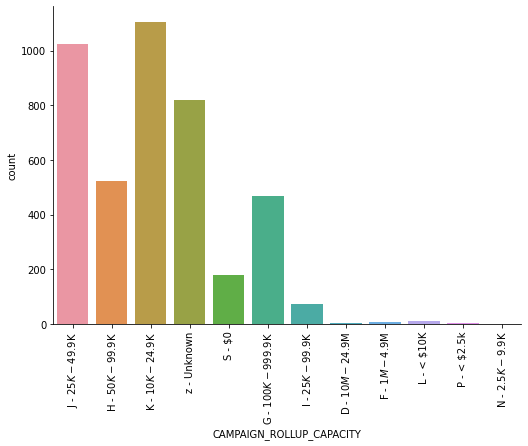

In [92]:
g = sns.catplot("CAMPAIGN_ROLLUP_CAPACITY", data=df_skip_0, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

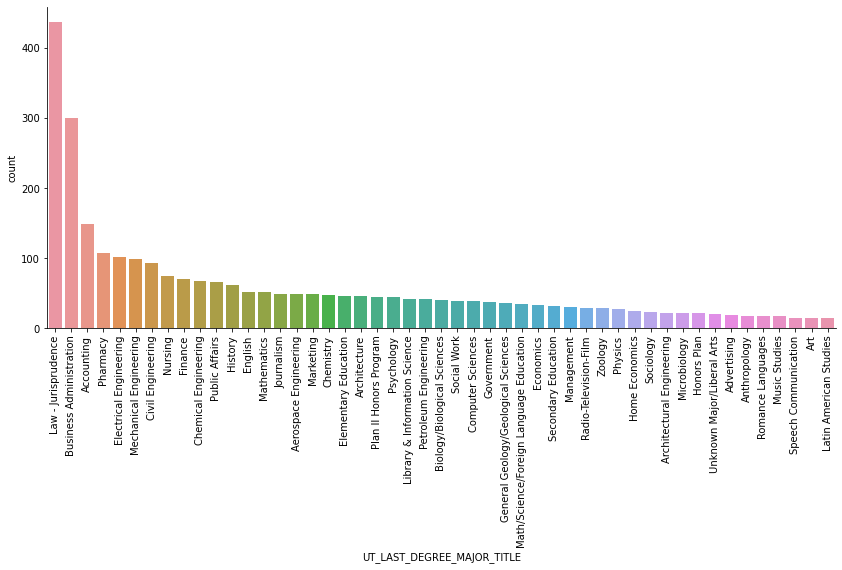

In [95]:
# UT_LAST_DEGREE_MAJOR_TITLE

plt_degree = sns.catplot(x="UT_LAST_DEGREE_MAJOR_TITLE",kind="count", aspect=25/10, data=df_skip_0, 
                         order=df_skip_0['UT_LAST_DEGREE_MAJOR_TITLE'].value_counts().iloc[1:50].index)
plt_degree.set_xticklabels(rotation=90)

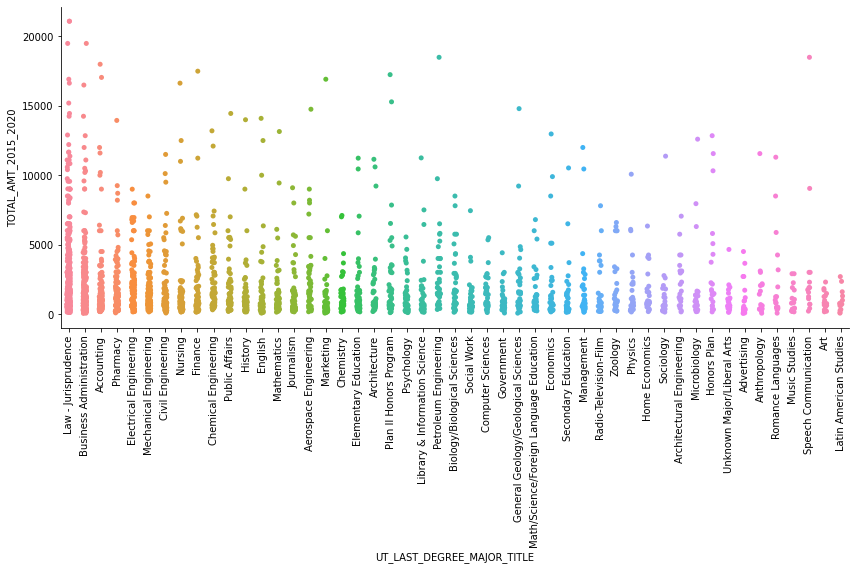

In [96]:
# UT_LAST_DEGREE_MAJOR_TITLE

plt_degree = sns.catplot(x="UT_LAST_DEGREE_MAJOR_TITLE", y="TOTAL_AMT_2015_2020",aspect=25/10, data=df_skip_0,
                         order=df_skip_0['UT_LAST_DEGREE_MAJOR_TITLE'].value_counts().iloc[1:50].index)
plt_degree.set_xticklabels(rotation=90)

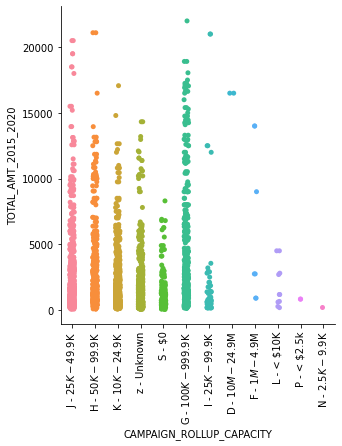

In [94]:
g = sns.catplot(x="CAMPAIGN_ROLLUP_CAPACITY", y="TOTAL_AMT_2015_2020", data=df_skip_0, jitter=0.1)
g.set_xticklabels(rotation=90)

## Step 3: Data Pre-Processing for Model Building

In [98]:
df_data.shape

(98368, 129)

In [100]:
df_data.drop(columns=['Giving_Year_Count','Skip_Years'],inplace=True)

In [101]:
df_data.head()

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,AGE,PROFESSIONAL_SUFFIX,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGREE,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,00017EH9,15.00,1,0,0,0,0,0,33.0,Ph.D.,1.0,M,Gen Y,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,West Coast States,CA,94070-4866,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MS,...,0.0,0.0,0.0,0.0,0.0,23-Oct-14,23-Oct-14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000V0H91,250.00,1,0,0,0,0,0,NaN,NaN,0.0,M,NaN,25000.0,I - $25K-$99.9K,Parent,Not a Member,NaN,NaN,Texas Metropolitan,TX,75093-3458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,20-May-15,20-May-15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001J3BUD,819.23,1,0,0,1,0,2,35.0,NaN,0.0,F,Gen Y,25000.0,J - $25K-$49.9K,Alumni,Not a Member,Asian Am,Unknown,Tri-States,PA,19123-2242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MBA,...,0.0,0.0,0.0,0.0,0.0,29-Jan-20,21-Apr-14,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001RB8B4,485.14,0,0,0,0,2,0,NaN,NaN,0.0,M,NaN,NaN,z - Unknown,Friend,Not a Member,NaN,Single,Other,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,15-Mar-19,15-Mar-19,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001TY1IF,1050.00,1,1,1,1,0,3,69.0,NaN,0.0,F,Boomer,100000.0,G - $100K-$999.9K,Friend,Life Member,NaN,Married,Texas Metropolitan,TX,77056-2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,18-Dec-19,28-Jun-00,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_data.columns:
    nullcount = df_data[col].isnull().sum()
    pct_missing = np.mean(df_data[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))
   

AGE 27232 - 28%
PROFESSIONAL_SUFFIX 90602 - 92%
PROFESSIONAL_SUFFIX_IND 6737 - 7%
GENDER 7210 - 7%
GENERATION 27232 - 28%
HH_CAPACITY_RANGE 53519 - 54%
CAMPAIGN_ROLLUP_CAPACITY 6737 - 7%
LINK_TO_UT 6737 - 7%
EX_MEMBER 7056 - 7%
ETHNICITY 48278 - 49%
MARITAL_STATUS 9042 - 9%
MSA 6737 - 7%
PREF_STATE 8171 - 8%
PREF_ZIPCODE 7244 - 7%
DEGREE_GR 6737 - 7%
DEGREE_CF 6737 - 7%
DEGREE_GL 6737 - 7%
DEGREE_JS 6737 - 7%
DEGREE_CO 6737 - 7%
DEGREE_EN 6737 - 7%
DEGREE_LO 6737 - 7%
DEGREE_AT 6737 - 7%
DEGREE_NS 6737 - 7%
DEGREE_ED 6737 - 7%
DEGREE_LJ 6737 - 7%
DEGREE_NU 6737 - 7%
DEGREE_LA 6737 - 7%
DEGREE_PH 6737 - 7%
DEGREE_SW 6737 - 7%
UNDERGRAD_IND 6737 - 7%
POSTGRAD_IND 6737 - 7%
FIRST_DEGREE 40046 - 41%
FIRST_DEGYR 6737 - 7%
SECOND_DEGREE 87329 - 89%
SECOND_DEGYR 6737 - 7%
FINAL_DEGREE 97288 - 99%
FINAL_DEGYR 6737 - 7%
NUM_DEGREES 6737 - 7%
MULTI_DEGREE_CSUS_IND 6737 - 7%
UT_LAST_DEGREE_MAJOR_TITLE 6737 - 7%
NUMBER_EXT_DEGREE 6737 - 7%
STEM_DEGREE 6737 - 7%
IS_ALUMNI 6737 - 7%
IS_PARENT_OF_ALU

In [103]:
df_data.dropna(thresh=90,inplace=True)

In [104]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_data.columns:
    nullcount = df_data[col].isnull().sum()
    pct_missing = np.mean(df_data[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))
   

AGE 20495 - 22%
PROFESSIONAL_SUFFIX 83865 - 92%
GENDER 473 - 1%
GENERATION 20495 - 22%
HH_CAPACITY_RANGE 46782 - 51%
EX_MEMBER 319 - 0%
ETHNICITY 41541 - 45%
MARITAL_STATUS 2305 - 3%
PREF_STATE 1434 - 2%
PREF_ZIPCODE 507 - 1%
FIRST_DEGREE 33309 - 36%
SECOND_DEGREE 80592 - 88%
FINAL_DEGREE 90551 - 99%


In [105]:
## data pre processing

df_data = df_data .drop(columns=['PROFESSIONAL_SUFFIX','SECOND_DEGREE','FINAL_DEGREE'])
df_data

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,AGE,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGREE,FIRST_DEGYR,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,00017EH9,15.00,1,0,0,0,0,0,33.0,1.0,M,Gen Y,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,West Coast States,CA,94070-4866,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MS,2014.0,...,0.0,0.0,0.0,0.0,0.0,23-Oct-14,23-Oct-14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000V0H91,250.00,1,0,0,0,0,0,NaN,0.0,M,NaN,25000.0,I - $25K-$99.9K,Parent,Not a Member,NaN,NaN,Texas Metropolitan,TX,75093-3458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,20-May-15,20-May-15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001J3BUD,819.23,1,0,0,1,0,2,35.0,0.0,F,Gen Y,25000.0,J - $25K-$49.9K,Alumni,Not a Member,Asian Am,Unknown,Tri-States,PA,19123-2242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MBA,2014.0,...,0.0,0.0,0.0,0.0,0.0,29-Jan-20,21-Apr-14,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001RB8B4,485.14,0,0,0,0,2,0,NaN,0.0,M,NaN,NaN,z - Unknown,Friend,Not a Member,NaN,Single,Other,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,15-Mar-19,15-Mar-19,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001TY1IF,1050.00,1,1,1,1,0,3,69.0,0.0,F,Boomer,100000.0,G - $100K-$999.9K,Friend,Life Member,NaN,Married,Texas Metropolitan,TX,77056-2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,18-Dec-19,28-Jun-00,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,96.0,0.0,F,G.I.,NaN,z - Unknown,Alumni,Short-term Member,NaN,Widowed,Texas Small Towns,TX,75757-9317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,BA,1947.0,...,0.0,0.0,0.0,0.0,0.0,12-Jun-20,30-Dec-75,22.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,48.0,0.0,F,Gen X,NaN,z - Unknown,Friend,Not a Member,NaN,Unknown,Austin Tx,TX,78664-6141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1-May-16,20-Aug-14,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98365,ZZZBT9C0,35.00,0,0

In [106]:
df_data['GENDER'].fillna(df_data['GENDER'].mode()[0], inplace = True)
df_data['MARITAL_STATUS'].fillna(df_data['MARITAL_STATUS'].mode()[0], inplace = True)
df_data['PREF_STATE'].fillna(df_data['PREF_STATE'].mode()[0], inplace = True)
df_data['EX_MEMBER'].fillna(df_data['EX_MEMBER'].mode()[0], inplace = True)

In [107]:
df_data['AGE'].fillna(df_data['AGE'].mean(),inplace = True)
print(df_data.isnull().sum())

RANDOM_ID              0
TOTAL_AMT_2015_2020    0
Donation_Year__2015    0
Donation_Year__2016    0
Donation_Year__2017    0
                      ..
GRP_CNT_SW             0
GRP_CNT_TS             0
GRP_CNT_UG             0
GRP_CNT_VS             0
GRP_PG_CNT             0
Length: 124, dtype: int64


In [108]:
df_data.shape 

(91631, 124)

In [109]:
selected_feature_df = df_data[['AGE','GENDER','LINK_TO_UT','EX_MEMBER','MARITAL_STATUS',
                       'MSA','DEGREE_GR','DEGREE_CF','DEGREE_GL','DEGREE_JS','DEGREE_CO','DEGREE_EN','DEGREE_LO','DEGREE_AT','DEGREE_NS',
                       'DEGREE_ED','DEGREE_LJ','DEGREE_NU','DEGREE_LA','DEGREE_PH','DEGREE_SW','TOTAL_YRS_GIVEN','GIFT_CNT','STEM_DEGREE',
                       'UNDERGRAD_IND', 'POSTGRAD_IND','MULTI_DEGREE_CSUS_IND','NUMBER_EXT_DEGREE','IS_ALUMNI','IS_PARENT_OF_ALUMNI',
                       'CHILD_IS_ENROLLED','IS_SPOUSE_OF_ALUMI','SPOUSE_IS_ENROLLED','CURRENT_UT_EMPLOYEE','PAST_UT_EMPLOYEE','CURRENT_FACULTY','CURRENT_STAFF',
                       'GRP_NONMON_GIFTS','LAST_GIVING_DATE','FIRST_GIVING_DATE','TOTAL_YRS_GIVEN','Donation_Year__2015','Donation_Year__2016','Donation_Year__2017',
                       'Donation_Year__2018','Donation_Year__2019','Donation_Year__2020']]

In [110]:
new_df = selected_feature_df.copy()

In [111]:
# Inspect the categorical variables

new_df.select_dtypes('object').nunique()

new_df.drop(columns=["LAST_GIVING_DATE","FIRST_GIVING_DATE"],inplace=True)

In [112]:
new_df.drop(columns="MSA",inplace=True) 

In [113]:
# Inspect the categorical variables

new_df.select_dtypes('object').nunique()


GENDER            3
LINK_TO_UT        6
EX_MEMBER         5
MARITAL_STATUS    6
dtype: int64

In [114]:
new_dum_df=pd.get_dummies(new_df)
new_dum_df.head()
new_dum_df.shape

(91631, 60)

In [115]:
new_dum_df.head()

,AGE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,TOTAL_YRS_GIVEN,GIFT_CNT,STEM_DEGREE,UNDERGRAD_IND,POSTGRAD_IND,MULTI_DEGREE_CSUS_IND,NUMBER_EXT_DEGREE,IS_ALUMNI,IS_PARENT_OF_ALUMNI,CHILD_IS_ENROLLED,IS_SPOUSE_OF_ALUMI,SPOUSE_IS_ENROLLED,CURRENT_UT_EMPLOYEE,PAST_UT_EMPLOYEE,CURRENT_FACULTY,CURRENT_STAFF,GRP_NONMON_GIFTS,TOTAL_YRS_GIVEN,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,GENDER_F,GENDER_M,GENDER_U,LINK_TO_UT_Alumni,LINK_TO_UT_Friend,"LINK_TO_UT_No Degree, Attended",LINK_TO_UT_Other,LINK_TO_UT_Parent,LINK_TO_UT_Student,EX_MEMBER_Assoc. Life,EX_MEMBER_Lapsed Member,EX_MEMBER_Life Member,EX_MEMBER_Not a Member,EX_MEMBER_Short-term Member,MARITAL_STATUS_Divorced,MARITAL_STATUS_Married,MARITAL_STATUS_Separated,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown,MARITAL_STATUS_Widowed
0,33.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,52.057144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,35.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1,0,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,52.057144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,69.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1,1,1,1,0,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


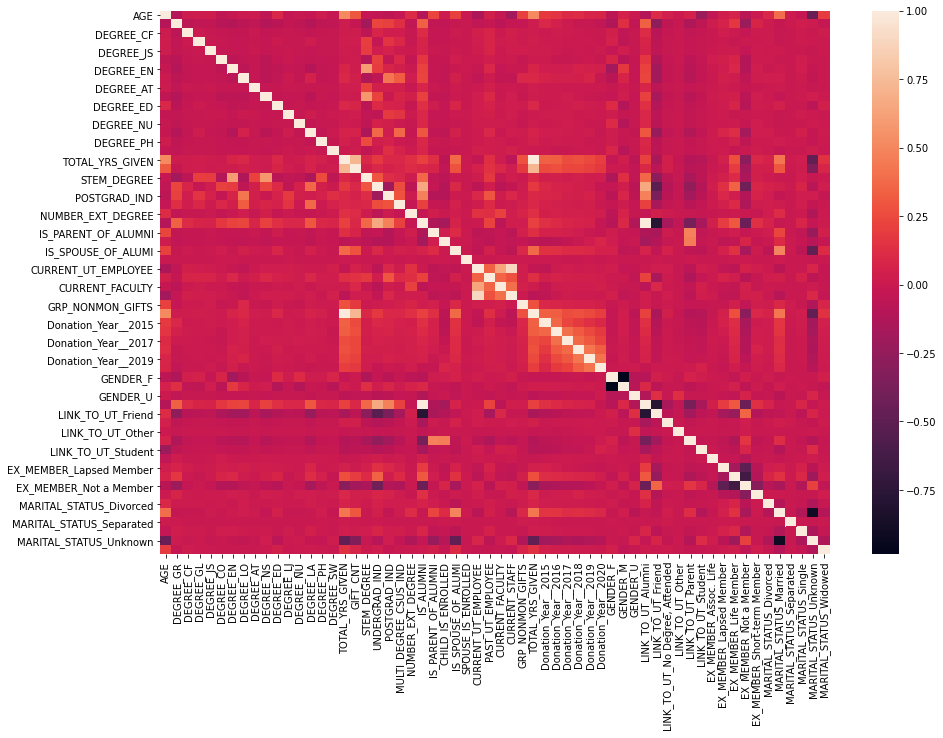

In [117]:

plt.figure(figsize=(15,10))
sns.heatmap(new_dum_df.corr())
plt.show()

In [118]:

def get_target_value(Donation_Year__2020):
  if(Donation_Year__2020 >= 1 ):
    return 1
  elif (Donation_Year__2020 == 0):
    return 0



In [119]:
def regroup_age(AGE):
  if ( AGE>=55):
    return 1
  elif (AGE<55):
    return 0

In [120]:
new_dum_df['is_AGE_Greater_55'] = new_dum_df.apply(lambda x: regroup_age(x['AGE']),axis=1)

In [121]:
new_dum_df['is_AGE_Greater_55'].value_counts()

0    58825
1    32806
Name: is_AGE_Greater_55, dtype: int64

In [122]:
new_dum_df['Target'] = new_dum_df.apply(lambda x: get_target_value(x['Donation_Year__2020']),axis=1)

In [123]:
new_dum_df['Target'].value_counts()

0    67697
1    23934
Name: Target, dtype: int64

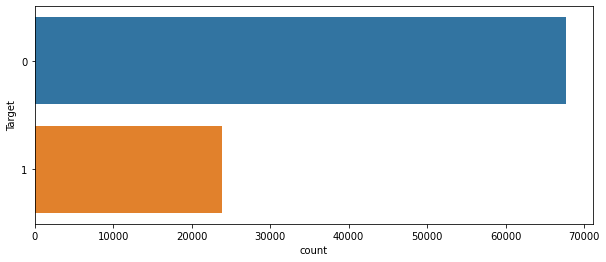

In [124]:
plt.figure(1 , figsize = (10 , 4))
sns.countplot(y = 'Target' , data = new_dum_df)
plt.show() 


In [125]:
y = new_dum_df['Target']

In [126]:
X = new_dum_df.drop(columns=['Target','Donation_Year__2020','TOTAL_YRS_GIVEN'],inplace=True)

In [127]:
X = new_dum_df.drop(columns=['AGE'])

In [128]:
X.shape


(91631, 57)

In [129]:
X.columns

Index(['DEGREE_GR', 'DEGREE_CF', 'DEGREE_GL', 'DEGREE_JS', 'DEGREE_CO',
       'DEGREE_EN', 'DEGREE_LO', 'DEGREE_AT', 'DEGREE_NS', 'DEGREE_ED',
       'DEGREE_LJ', 'DEGREE_NU', 'DEGREE_LA', 'DEGREE_PH', 'DEGREE_SW',
       'GIFT_CNT', 'STEM_DEGREE', 'UNDERGRAD_IND', 'POSTGRAD_IND',
       'MULTI_DEGREE_CSUS_IND', 'NUMBER_EXT_DEGREE', 'IS_ALUMNI',
       'IS_PARENT_OF_ALUMNI', 'CHILD_IS_ENROLLED', 'IS_SPOUSE_OF_ALUMI',
       'SPOUSE_IS_ENROLLED', 'CURRENT_UT_EMPLOYEE', 'PAST_UT_EMPLOYEE',
       'CURRENT_FACULTY', 'CURRENT_STAFF', 'GRP_NONMON_GIFTS',
       'Donation_Year__2015', 'Donation_Year__2016', 'Donation_Year__2017',
       'Donation_Year__2018', 'Donation_Year__2019', 'GENDER_F', 'GENDER_M',
       'GENDER_U', 'LINK_TO_UT_Alumni', 'LINK_TO_UT_Friend',
       'LINK_TO_UT_No Degree, Attended', 'LINK_TO_UT_Other',
       'LINK_TO_UT_Parent', 'LINK_TO_UT_Student', 'EX_MEMBER_Assoc. Life',
       'EX_MEMBER_Lapsed Member', 'EX_MEMBER_Life Member',
       'EX_MEMBER_Not a Member', '

## Step 4 : Algorithm Selection and Model Building

In [132]:
! pip install scikit-optimize

     |████████████████████████████████| 102kB 3.6MB/s 


In [134]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier,plot_importance

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import skopt
from skopt import BayesSearchCV

from sklearn import model_selection
from sklearn.model_selection import cross_val_score


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(73304, 57) (18327, 57)


Model 1: Logistic Regression

In [135]:
# Model No.1 Logistic
# Instantiate the model

logit_model = LogisticRegression()

# Fit the model using training data

logit_model = logit_model.fit(X_train, y_train)

predicted_train = logit_model.predict(X_train)
print('The train accuracy is: ', metrics.accuracy_score(y_train, predicted_train))


# Predictions on the test dataset
logit_predicted_test = pd.DataFrame(logit_model.predict(X_test))
print('The test accuracy is: ', metrics.accuracy_score(y_test, logit_predicted_test))


The train accuracy is:  0.7521554076175925
The test accuracy is:  0.7499863589239919


In [136]:
print(metrics.confusion_matrix(y_test, logit_predicted_test))
print(metrics.classification_report(y_test, logit_predicted_test))

[[12973   544]
 [ 4038   772]]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85     13517
           1       0.59      0.16      0.25      4810

    accuracy                           0.75     18327
   macro avg       0.67      0.56      0.55     18327
weighted avg       0.72      0.75      0.69     18327



Model 2. Decision Tree 

In [137]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [138]:
def cross_validation(model,X_train,y_train,modelName):
    scoring = 'roc_auc'
    score = model_selection.cross_val_score(model, X_train, y_train, cv = 10, scoring=scoring)
    mean_score = score.mean()
    print(" roc-auc value for " + str(modelName) + ": %.3f (%.3f)" % (score.mean(), score.std()))
    return mean_score

In [139]:
decision_tree_classifier = tree.DecisionTreeClassifier()

In [140]:
decision_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [141]:
cross_validation(decision_tree_classifier,X_train,y_train,'Decision_Tree')

 roc-auc value for Decision_Tree: 0.783 (0.008)


0.7832460966663679

In [ ]:
print('The train accuracy is: ', metrics.accuracy_score(y_train, predicted_train))

In [142]:
decision_tree_test_preds = decision_tree_classifier.predict(X_test) ## testing the model on validation set

In [143]:
print(metrics.confusion_matrix(y_test, decision_tree_test_preds))
print(metrics.classification_report(y_test, decision_tree_test_preds))

[[11948  1569]
 [ 1610  3200]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     13517
           1       0.67      0.67      0.67      4810

    accuracy                           0.83     18327
   macro avg       0.78      0.77      0.78     18327
weighted avg       0.83      0.83      0.83     18327



Model 3: Random Forest Classifier

In [144]:
random_forest_classifier = RandomForestClassifier() 

In [145]:
cross_validation(random_forest_classifier,X_train,y_train,'Random_Forest') 

 roc-auc value for Random_Forest: 0.906 (0.005)


0.905575491711752

In [146]:
 random_forest_classifier.fit(X_train,y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
random_forest_predictions = random_forest_classifier.predict(X_test)

In [148]:
print(metrics.confusion_matrix(y_test, random_forest_predictions))
print(metrics.classification_report(y_test, random_forest_predictions))

[[12665   852]
 [ 1742  3068]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     13517
           1       0.78      0.64      0.70      4810

    accuracy                           0.86     18327
   macro avg       0.83      0.79      0.80     18327
weighted avg       0.85      0.86      0.85     18327



In [149]:
random_forest_classifier.feature_importances_

array([9.16623009e-03, 3.55511194e-03, 1.57370062e-03, 2.20339646e-03,
       5.18074243e-03, 5.75033310e-03, 8.21841451e-03, 2.27672126e-03,
       5.28651367e-03, 4.74087944e-03, 2.59749891e-03, 2.52618263e-03,
       9.05813104e-03, 2.59970114e-03, 2.11135741e-03, 1.71729937e-01,
       6.88085237e-03, 1.01651384e-02, 1.10898951e-02, 6.53607746e-03,
       1.18861796e-02, 4.84915454e-03, 1.31948156e-02, 1.02506879e-02,
       1.69345219e-02, 3.69222097e-05, 4.93829779e-03, 1.66438112e-02,
       4.31447811e-03, 4.79413548e-03, 6.07466651e-03, 8.24376268e-02,
       8.15190709e-02, 8.72376109e-02, 1.21479619e-01, 1.26154787e-01,
       1.24677990e-02, 1.24449240e-02, 6.26046831e-04, 4.70000752e-03,
       4.64037033e-03, 1.81894297e-03, 2.98429631e-04, 3.29450577e-03,
       6.41771521e-03, 1.16387251e-03, 9.33080339e-03, 1.07236478e-02,
       1.23533901e-02, 6.41196121e-03, 2.70205544e-03, 1.01598476e-02,
       2.72176466e-05, 2.59474643e-03, 9.15182777e-03, 2.47315578e-03,
      

Text(0.5, 0, 'Random Forest Feature Importance')

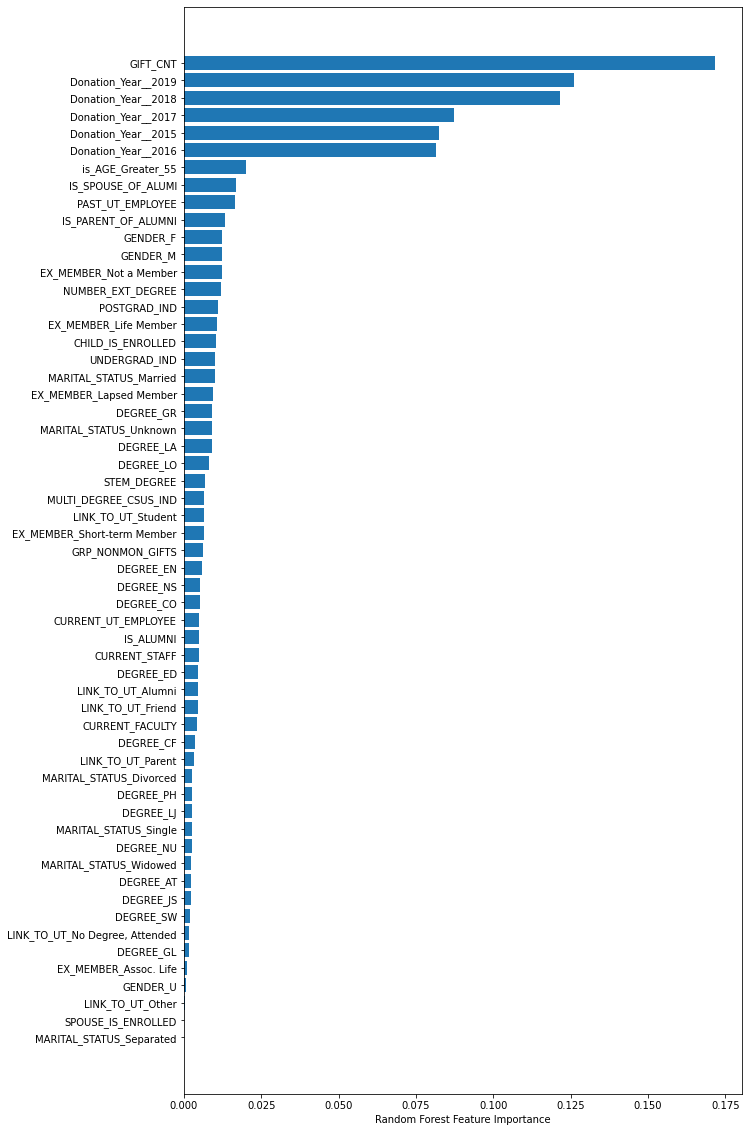

In [150]:
plt.figure(figsize=(10,20))
sorted_idx = random_forest_classifier.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], random_forest_classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Model 4 : XGBClassifier

In [151]:
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier,plot_importance

In [152]:
xgboost_classifier = XGBClassifier()

In [153]:
cross_validation(xgboost_classifier,X_train,y_train,'XGB_Classifier')

 roc-auc value for XGB_Classifier: 0.896 (0.004)


0.895975635311738

In [154]:
xgboost_classifier.fit(X_train,y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [155]:
xgboost_predictions = xgboost_classifier.predict(X_test)

In [156]:
print(metrics.confusion_matrix(y_test, xgboost_predictions))
print(metrics.classification_report(y_test, xgboost_predictions))

[[12909   608]
 [ 1942  2868]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13517
           1       0.83      0.60      0.69      4810

    accuracy                           0.86     18327
   macro avg       0.85      0.78      0.80     18327
weighted avg       0.86      0.86      0.85     18327



Text(0.5, 0, 'XGBoost Feature Importance')

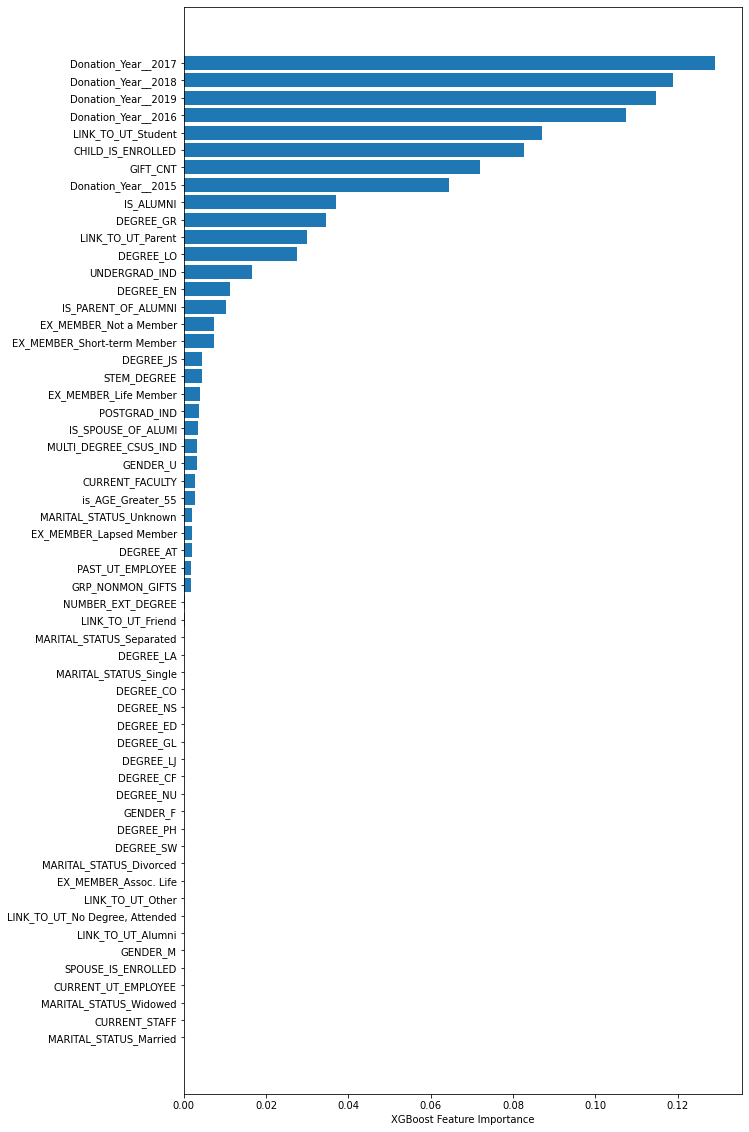

In [157]:
plt.figure(figsize=(10,20))
sorted_idx = xgboost_classifier.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgboost_classifier.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

In [158]:
pip install shap

     |████████████████████████████████| 358kB 5.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491619 sha256=56775e368b98302ee1d5b0106e5035c7cb92df4945befdf96d2f32037d84e0c5
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


100%|===================| 91182/91631 [02:43<00:00]       

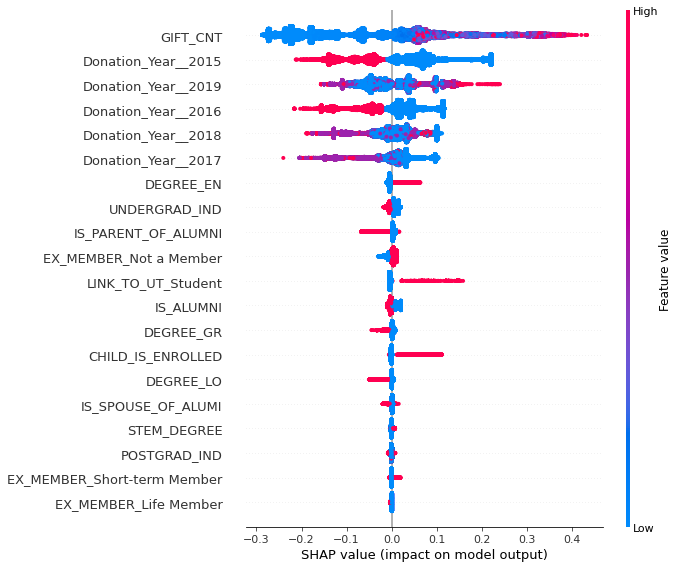

In [159]:
import shap

explainer = shap.TreeExplainer(xgboost_classifier, model_output='probability', feature_dependence='independent', data=X)

shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

## Regroup Age < or  > 55

## Total Amnt and Grp_Prod remove these features

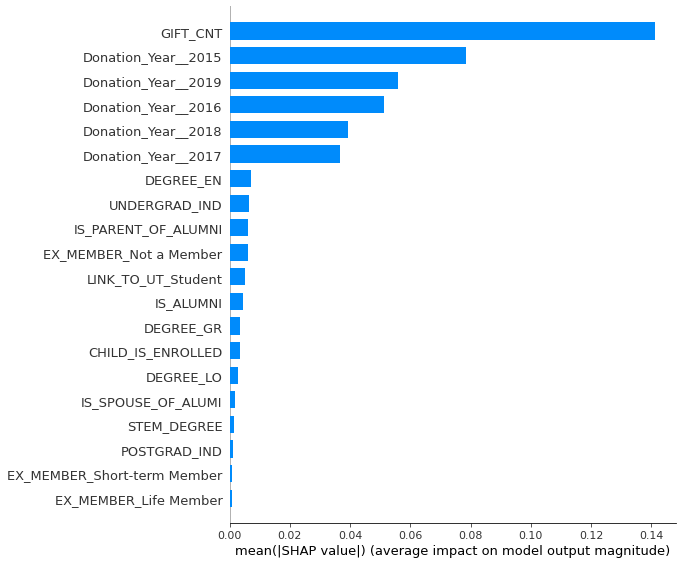

In [160]:
shap.summary_plot(shap_values, X, plot_type="bar") 

Hyper Parameter Tuning for XGB Classifier

In [161]:
ITERATIONS = 5


# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
      search_spaces = {
        'min_samples_split': [3, 5, 8, 10, 20], 
        'n_estimators' : (100, 600),
        'max_depth': (3,20),
        'max_features': [3, 5, 8],
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'colsample_bytree': (0.1, 1.0, 'uniform'),
        'colsample_bylevel': (0.4, 1.0, 'uniform')


    },     
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

In [162]:
def Print_Model_Results(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    

In [163]:
result = bayes_cv_tuner.fit(X_train, y_train, callback=Print_Model_Results)

Model #1
Best ROC-AUC: 0.9012
Best params: OrderedDict([('colsample_bylevel', 0.6460623753119883), ('colsample_bytree', 0.7549531688595925), ('learning_rate', 0.7340675018434776), ('max_depth', 8), ('max_features', 5), ('min_samples_split', 8), ('n_estimators', 275)])

Model #2
Best ROC-AUC: 0.9212
Best params: OrderedDict([('colsample_bylevel', 0.9024330133319707), ('colsample_bytree', 0.894983749642776), ('learning_rate', 0.04044084484117812), ('max_depth', 19), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 169)])

Model #3
Best ROC-AUC: 0.9242
Best params: OrderedDict([('colsample_bylevel', 0.6668995073806911), ('colsample_bytree', 0.9268502695024393), ('learning_rate', 0.01620758534278905), ('max_depth', 10), ('max_features', 3), ('min_samples_split', 8), ('n_estimators', 178)])

Model #4
Best ROC-AUC: 0.9242
Best params: OrderedDict([('colsample_bylevel', 0.6668995073806911), ('colsample_bytree', 0.9268502695024393), ('learning_rate', 0.01620758534278905), ('max_

In [ ]:
xgb_bayestuned = XGBClassifier(max_depth=17,max_features=5,min_samples_split=3,
                               n_estimators=385,colsample_bylevel=0.7260418406141875,
                               colsample_bytree = 0.9280083037935848,learning_rate = 0.09838602333915322)

In [ ]:
xgb_bayestuned.fit(X_train,y_train)  

In [ ]:
xgboost_predictions_tuned = xgb_bayestuned.predict(X_test) 

In [ ]:
print(metrics.confusion_matrix(y_test, xgboost_predictions_tuned)) 
print(metrics.classification_report(y_test, xgboost_predictions_tuned))